# Because the results show different cubic-micrometer values, I wil try to normalize the data, which puts every voluem value in relation to the highest volume value. This will create results from 0 to 1

https://www.statology.org/normalize-data-between-0-and-1/

### Normalize volumes from manual thresholding method 

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
db = pd.read_excel("Volume_Calculation_manualThresh.xlsx") # uncomment code in cell above if pandas can't read the file 
db.head()

,filename,image_scale_factor,count,metric_to_pixel,volume
0,cell_frame004141_x0100_y0956_red.tif,0.633663,42103,0.001691,71.216085
1,cell_frame004141_x0220_y0163_red.tif,0.603774,33192,0.001955,64.901084
2,cell_frame004141_x0271_y0573_red.tif,0.561404,29141,0.002432,70.879385
3,cell_frame004141_x0308_y0201_red.tif,0.524590,25434,0.002981,75.821975
4,cell_frame004141_x0425_y0085_red.tif,0.551724,24490,0.002563,62.757218


In [3]:
min_value = db["volume"].min()
max_value = db["volume"].max()


### Normalize the values using the formula 
### zi = (xi – min(x)) / (max(x) – min(x))

In [4]:

db['normalized'] = (db['volume'] - min_value) / (max_value - min_value)
db.head()

,filename,image_scale_factor,count,metric_to_pixel,volume,normalized
0,cell_frame004141_x0100_y0956_red.tif,0.633663,42103,0.001691,71.216085,0.216063
1,cell_frame004141_x0220_y0163_red.tif,0.603774,33192,0.001955,64.901084,0.180813
2,cell_frame004141_x0271_y0573_red.tif,0.561404,29141,0.002432,70.879385,0.214183
3,cell_frame004141_x0308_y0201_red.tif,0.524590,25434,0.002981,75.821975,0.241773
4,cell_frame004141_x0425_y0085_red.tif,0.551724,24490,0.002563,62.757218,0.168846


### Normalize volumes from SHAPR thresholding method 

In [5]:
db1 = pd.read_excel("Volume_Calculation_bySHAPR.xlsx") 
min_value1 = db1["volume"].min()
max_value1 = db1["volume"].max()


In [6]:
db1['normalized'] = (db1['volume'] - min_value1) / (max_value1 - min_value1)
db1.head()

,filename,image_scale_factor,count,metric_to_pixel,volume,normalized
0,cell_frame004141_x0100_y0956_red.tif,0.633663,51987,0.001691,87.934604,0.225280
1,cell_frame004141_x0220_y0163_red.tif,0.603774,41832,0.001955,81.795075,0.196581
2,cell_frame004141_x0271_y0573_red.tif,0.561404,35622,0.002432,86.643061,0.219243
3,cell_frame004141_x0308_y0201_red.tif,0.524590,31185,0.002981,92.966434,0.248801
4,cell_frame004141_x0425_y0085_red.tif,0.551724,29913,0.002563,76.654009,0.172550


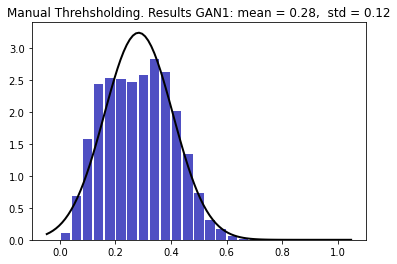

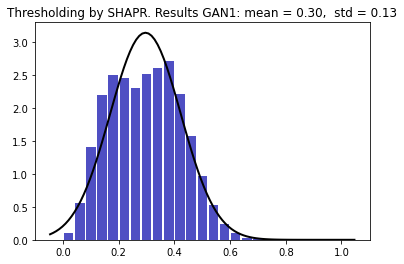

In [7]:
#first plot
cv = db["normalized"]
cv = cv.to_numpy()
mean, std = norm.fit(cv)

plt.hist(cv, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Manual Threhsholding. Results GAN1: mean = %.2f,  std = %.2f" % (mean, std)
plt.title(title)
plt.show()


#second plot
cv1 = db1["normalized"]
cv1 = cv1.to_numpy()
mean1, std1 = norm.fit(cv1)

plt.hist(cv1, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mean1, std1)
plt.plot(x1, p1, 'k', linewidth=2)
title1 = "Thresholding by SHAPR. Results GAN1: mean = %.2f,  std = %.2f" % (mean1, std1)
plt.title(title1)
plt.show()

# I want to know how the results of my prediction differ from the results of the training set used by the SHAPR authors
the datasets can also be find here: https://zenodo.org/record/7031924#.ZFPXCC9n5pQ


In [8]:
db2 = pd.read_csv("SHAPR_features.csv")
db2.head()

,filename,volume,surface,mean,xy_bounary,xz_boundary,yz_boundary,boundary_3D,shape_index,roughness,...,mesh_principal02,mesh_principal10,mesh_principal11,mesh_principal12,mesh_principal13,mesh_principal14,mesh_principal15,mesh_principal16,mesh_principal17,mesh_principal18
0,-0.33_stomatocyte_I000000.tif,20787.0,5536.506348,0.079296,184,148,154,6593,-0.531104,25.274067,...,-2.328865e+06,-0.986146,-0.165560,-0.010267,-0.116890,0.649666,0.751179,-0.117695,0.741973,-0.660018
1,-0.33_stomatocyte_I000001.tif,24638.0,6529.510742,0.093987,180,190,147,7969,-0.801562,27.338200,...,-3.066534e+06,-0.636482,-0.626722,-0.449567,-0.765212,0.440068,0.469883,0.096646,-0.643086,0.759671
2,-0.33_stomatocyte_I000002.tif,36627.0,8590.640625,0.139721,206,186,176,10147,-0.060982,31.126889,...,-7.070149e+06,-0.998505,-0.052647,0.014723,-0.054657,0.966607,-0.250368,0.001050,0.250798,0.968039
3,-0.33_stomatocyte_I000003.tif,22275.0,5700.924805,0.084972,166,151,145,6699,-1.333363,25.363911,...,-2.720044e+06,-0.992075,-0.125215,-0.010369,-0.124936,0.974383,0.187000,0.013312,-0.186814,0.982305
4,-0.33_stomatocyte_I000004.tif,25156.0,6244.464844,0.095963,177,163,143,7374,-0.564773,26.586762,...,-3.605762e+06,-0.988314,-0.117250,0.097405,-0.114059,0.992757,0.037725,0.101123,-0.026174,0.994530


In [9]:
min_value2 = db2["volume"].min()
max_value2 = db2["volume"].max()

In [10]:
db2['normalized'] = (db2['volume'] - min_value2) / (max_value2 - min_value2)
db2.head()

,filename,volume,surface,mean,xy_bounary,xz_boundary,yz_boundary,boundary_3D,shape_index,roughness,...,mesh_principal10,mesh_principal11,mesh_principal12,mesh_principal13,mesh_principal14,mesh_principal15,mesh_principal16,mesh_principal17,mesh_principal18,normalized
0,-0.33_stomatocyte_I000000.tif,20787.0,5536.506348,0.079296,184,148,154,6593,-0.531104,25.274067,...,-0.986146,-0.165560,-0.010267,-0.116890,0.649666,0.751179,-0.117695,0.741973,-0.660018,0.156120
1,-0.33_stomatocyte_I000001.tif,24638.0,6529.510742,0.093987,180,190,147,7969,-0.801562,27.338200,...,-0.636482,-0.626722,-0.449567,-0.765212,0.440068,0.469883,0.096646,-0.643086,0.759671,0.237652
2,-0.33_stomatocyte_I000002.tif,36627.0,8590.640625,0.139721,206,186,176,10147,-0.060982,31.126889,...,-0.998505,-0.052647,0.014723,-0.054657,0.966607,-0.250368,0.001050,0.250798,0.968039,0.491478
3,-0.33_stomatocyte_I000003.tif,22275.0,5700.924805,0.084972,166,151,145,6699,-1.333363,25.363911,...,-0.992075,-0.125215,-0.010369,-0.124936,0.974383,0.187000,0.013312,-0.186814,0.982305,0.187623
4,-0.33_stomatocyte_I000004.tif,25156.0,6244.464844,0.095963,177,163,143,7374,-0.564773,26.586762,...,-0.988314,-0.117250,0.097405,-0.114059,0.992757,0.037725,0.101123,-0.026174,0.994530,0.248619


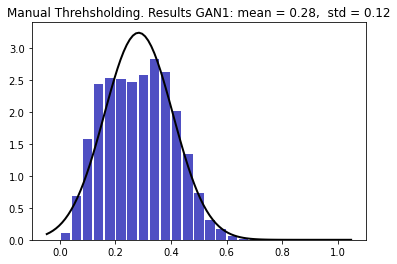

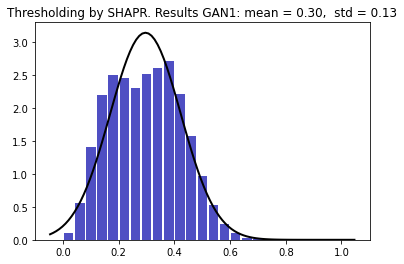

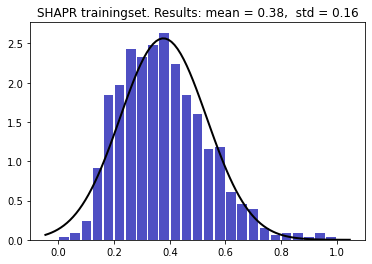

In [11]:

#first plot
cv = db["normalized"]
cv = cv.to_numpy()
mean, std = norm.fit(cv)

plt.hist(cv, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Manual Threhsholding. Results GAN1: mean = %.2f,  std = %.2f" % (mean, std)
plt.title(title)
plt.show()


#second plot
cv1 = db1["normalized"]
cv1 = cv1.to_numpy()
mean1, std1 = norm.fit(cv1)

plt.hist(cv1, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mean1, std1)
plt.plot(x1, p1, 'k', linewidth=2)
title1 = "Thresholding by SHAPR. Results GAN1: mean = %.2f,  std = %.2f" % (mean1, std1)
plt.title(title1)
plt.show()

#third plot
cv2 = db2["normalized"]
cv2 = cv2.to_numpy()
mean2, std2 = norm.fit(cv2)


plt.hist(cv2, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin2, xmax2 = plt.xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = norm.pdf(x2, mean2, std2)
plt.plot(x2, p2, 'k', linewidth=2)
title2 = "SHAPR trainingset. Results: mean = %.2f,  std = %.2f" % (mean2, std2)
plt.title(title2)
plt.show()

### Now i want to see how the normalized predictions differ with the absorption analysis data. 

In [12]:
db3 = pd.read_excel("Absorption_Analysis_Cleaned.xlsx") 

In [13]:
min_value3 = db3["CV"].min()
max_value3 = db3["CV"].max()
db3['normalized'] = (db3['CV'] - min_value3) / (max_value3 - min_value3)
db3.head()

,framenum,color,pos_x,pos_y,CV,Normal Distribution,area,x_length,y_length,meanPXbgFromfg,meanPXfg,normalized
0,4389,red,129,206,478.612250,0.000010,3013.0,73,53,0,191.305538,0.000000
1,6166,red,115,812,494.388525,0.000015,3106.5,82,48,0,195.017155,0.025256
2,4308,red,92,568,499.869536,0.000018,3148.5,79,51,0,189.679199,0.034031
3,6575,red,107,192,507.389792,0.000022,3192.0,75,54,0,198.644769,0.046070
4,5548,red,108,245,516.747092,0.000028,3255.0,79,53,0,192.003579,0.061050


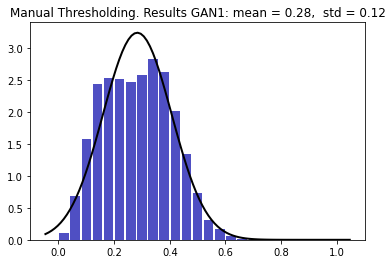

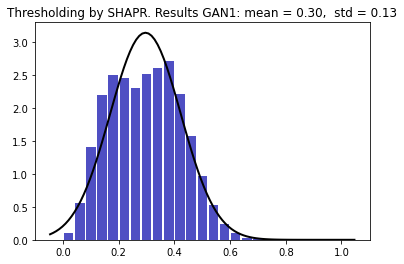

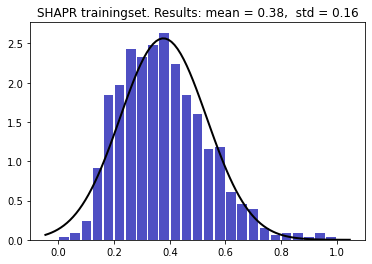

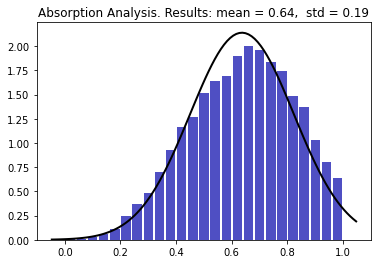

In [14]:
#first plot
cv = db["normalized"]
cv = cv.to_numpy()
mean, std = norm.fit(cv)

plt.hist(cv, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Manual Thresholding. Results GAN1: mean = %.2f,  std = %.2f" % (mean, std)
plt.title(title)
plt.show()


#second plot
cv1 = db1["normalized"]
cv1 = cv1.to_numpy()
mean1, std1 = norm.fit(cv1)

plt.hist(cv1, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mean1, std1)
plt.plot(x1, p1, 'k', linewidth=2)
title1 = "Thresholding by SHAPR. Results GAN1: mean = %.2f,  std = %.2f" % (mean1, std1)
plt.title(title1)
plt.show()

#third plot
cv2 = db2["normalized"]
cv2 = cv2.to_numpy()
mean2, std2 = norm.fit(cv2)


plt.hist(cv2, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin2, xmax2 = plt.xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = norm.pdf(x2, mean2, std2)
plt.plot(x2, p2, 'k', linewidth=2)
title2 = "SHAPR trainingset. Results: mean = %.2f,  std = %.2f" % (mean2, std2)
plt.title(title2)
plt.show()

#fourth plot
cv3 = db3["normalized"]
cv3 = cv3.to_numpy()
mean3, std3 = norm.fit(cv3)


plt.hist(cv3, bins=25, density=True, color='#0504aa', alpha=0.7, rwidth=0.85)
xmin3, xmax3 = plt.xlim()
x3 = np.linspace(xmin3, xmax3, 100)
p3 = norm.pdf(x3, mean3, std3)
plt.plot(x3, p3, 'k', linewidth=2)
title3 = "Absorption Analysis. Results: mean = %.2f,  std = %.2f" % (mean3, std3)
plt.title(title3)
plt.show()



# Create overlayd histograms

### predictions and absorption analysis

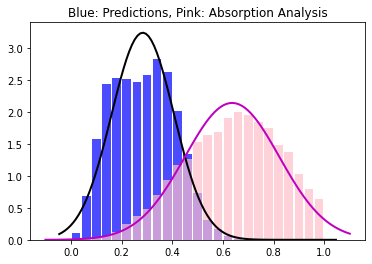

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

cv = db["normalized"]
cv = cv.to_numpy()
mean, std = norm.fit(cv)

plt.hist(cv, bins=25, density=True, color='blue', alpha=0.7, rwidth=0.85)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

cv3 = db3["normalized"]
cv3 = cv3.to_numpy()
mean3, std3 = norm.fit(cv3)

plt.hist(cv3, bins=25, density=True, color='pink', alpha=0.7, rwidth=0.85)
xmin3, xmax3 = plt.xlim()
x3 = np.linspace(xmin3, xmax3, 100)
p3 = norm.pdf(x3, mean3, std3)
plt.plot(x3, p3, 'm', linewidth=2)
title = "Blue: Predictions, Pink: Absorption Analysis"
plt.title(title)

plt.show()


### Predictions and training data

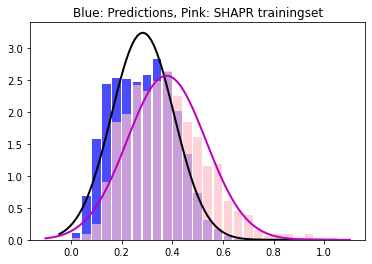

In [16]:
cv = db["normalized"]
cv = cv.to_numpy()
mean, std = norm.fit(cv)

plt.hist(cv, bins=25, density=True, color='blue', alpha=0.7, rwidth=0.85)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

cv2 = db2["normalized"]
cv2 = cv2.to_numpy()
mean2, std2 = norm.fit(cv2)


plt.hist(cv2, bins=25, density=True, color='pink', alpha=0.7, rwidth=0.85)
xmin2, xmax2 = plt.xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = norm.pdf(x2, mean2, std2)
plt.plot(x2, p2, 'm', linewidth=2)
title = "Blue: Predictions, Pink: SHAPR trainingset"
plt.title(title)



plt.show()